# Name : Suman Jha


Task 7 - Stock Market Analysis and Prediciton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import yfinance as yf

In [3]:
stockprice = yf.download('^BSESN', start='2015-01-01', end='2022-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
stockheadlines=pd.read_csv('india-news-headlines.csv')

In [5]:
stockprice.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,27358.300781,27527.240234,27346.000000,27499.419922,27499.419922,6500
2015-01-02,27521.279297,27937.470703,27519.259766,27887.900391,27887.900391,7400
2015-01-05,27978.429688,28064.490234,27786.849609,27842.320312,27842.320312,9200
2015-01-06,27694.230469,27698.929688,26937.060547,26987.460938,26987.460938,14100
2015-01-07,26983.429688,27051.599609,26776.119141,26908.820312,26908.820312,12200


In [6]:
stockheadlines.head(5)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


# Filtering the dataset

In [7]:
len(stockprice), len(stockheadlines)

(1722, 3650970)

In [8]:
#checking dataset for empty values
stockprice.isna().any(), stockheadlines.isna().any()

(Open         False
 High         False
 Low          False
 Close        False
 Adj Close    False
 Volume       False
 dtype: bool,
 publish_date         False
 headline_category    False
 headline_text        False
 dtype: bool)

In [9]:
#for stock price data removing all the duplicate values
stockprice = stockprice.drop_duplicates()

In [10]:
# for stock price changing the colun type to similar object type
stockprice.reset_index(inplace=True)
stockprice['Date']=pd.to_datetime(stockprice['Date'],format='%Y-%m-%d')

In [11]:
#filtering the important columns required 
stockprice=stockprice.filter(['Date', 'Close', 'Open', 'High', 'Low','Volume'])

In [12]:
#setting column date as index column
stockprice.set_index('Date', inplace=True)

In [13]:
#sorting the values of the dataset by the date
stockprice.sort_values(by='Date', ascending=False)
stockprice.head(5)

,Close,Open,High,Low,Volume
Date,,,,,
2014-12-31,27499.419922,27358.300781,27527.240234,27346.000000,6500
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200


stock headlines dataset

In [14]:
#for stock headlines dataset removing all the duplicate values
stockheadlines = stockheadlines.drop_duplicates()

In [15]:
stockheadlines.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3626110 entries, 0 to 3650969
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   publish_date       int64 
 1   headline_category  object
 2   headline_text      object
dtypes: int64(1), object(2)
memory usage: 110.7+ MB


In [16]:
#lets now convert date column to datetime type from string type
stockheadlines['publish_date']=stockheadlines['publish_date'].astype(str)
stockheadlines['publish_date']=stockheadlines['publish_date'].apply(lambda x:x[0:4]+'-'+x[4:6]+'-'+x[6:8])
stockheadlines['publish_date']=pd.to_datetime(stockheadlines['publish_date']).dt.normalize()

In [17]:
#filtering the important columns
stockheadlines = stockheadlines.filter(['publish_date', 'headline_text'])

#grouping the headlines by date
stockheadlines = stockheadlines.groupby(['publish_date'])['headline_text'].apply(lambda x: ','.join(x)).reset_index()

In [18]:
#setting column date as index  column
stockheadlines.set_index('publish_date', inplace=True)

In [19]:
#sorting the headlines 
stockheadlines = stockheadlines.sort_index(axis=0, ascending=True)

In [20]:
stockheadlines.head(10)

,headline_text
publish_date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-03,"Powerless north India gropes in the dark,Think..."
2001-01-04,The string that pulled Stephen Hawking to Indi...
2001-01-05,Light combat craft takes India into club class...
2001-01-06,Light combat craft takes India into club class...
2001-01-07,"Muslim body rules out talks on Ayodhya,Bajrang..."
2001-01-08,"Sangh Parivar; Babri panel up the ante,Frontru..."
2001-01-09,Financier Bharat Shah held for alleged links w...
2001-01-10,"Fend for yourselves; Pande tells doctors,Burea..."


# combining the both dataset

In [28]:
stock = pd.concat([stockprice, stockheadlines], axis=1)
stock.dropna(axis=0, inplace=True)

In [29]:
stock

,Close,Open,High,Low,Volume,headline_text
2014-12-31,27499.419922,27358.300781,27527.240234,27346.000000,6500.0,"Why breakfast is so important,No need to banis..."
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400.0,"Drink smart with these party tips,How to say s..."
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200.0,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera..."
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100.0,"Turn to gardening for happiness,Teeth jeweller..."
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200.0,"Can ex-lovers be friends?,Is water diet bad fo..."
...,...,...,...,...,...,...
2021-12-27,57420.238281,56948.328125,57512.011719,56543.078125,5700.0,"Goa sees 48 new Covid infections,Here's how Ja..."
2021-12-28,57897.480469,57751.210938,57952.480469,57650.289062,5500.0,Horoscope Today; 28 December 2021: Check astro...
2021-12-29,57806.488281,57892.308594,58097.070312,57684.578125,5300.0,Horoscope Today; 29 December 2021: Check astro...
2021-12-30,57794.320312,57755.398438,58010.031250,57578.988281,7300.0,Gradual rise in temperature likely in the next...


# Calculating Sentiment Scores

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata

In [31]:
sid= SentimentIntensityAnalyzer()

In [40]:
polarity = [round(sid.polarity_scores(i)['compound'], 2) for i in stock['headline_text']]
stock['compound'] = polarity

In [41]:
polarity = [round(sid.polarity_scores(i)['neg'], 2) for i in stock['headline_text']]
stock['negative'] = polarity

In [42]:
polarity = [round(sid.polarity_scores(i)['neu'], 2) for i in stock['headline_text']]
stock['neutral'] = polarity

In [43]:
polarity = [round(sid.polarity_scores(i)['pos'], 2) for i in stock['headline_text']]
stock['positive'] = polarity

In [44]:
stock.head(5)

,Close,Open,High,Low,Volume,headline_text,compound,negative,neutral,positive
2014-12-31,27499.419922,27358.300781,27527.240234,27346.000000,6500.0,"Why breakfast is so important,No need to banis...",-1.0,0.13,0.78,0.09
2015-01-02,27887.900391,27521.279297,27937.470703,27519.259766,7400.0,"Drink smart with these party tips,How to say s...",-1.0,0.13,0.77,0.10
2015-01-05,27842.320312,27978.429688,28064.490234,27786.849609,9200.0,"Recipe: Strawberry cupcakes,Recipe: Kaju jeera...",-1.0,0.12,0.77,0.11
2015-01-06,26987.460938,27694.230469,27698.929688,26937.060547,14100.0,"Turn to gardening for happiness,Teeth jeweller...",-1.0,0.10,0.83,0.07
2015-01-07,26908.820312,26983.429688,27051.599609,26776.119141,12200.0,"Can ex-lovers be friends?,Is water diet bad fo...",-1.0,0.15,0.77,0.08


In [45]:
#removing the headline data as we dont need it anymore
stock.drop(['headline_text'], inplace=True, axis=1)

In [46]:
#rearranging the column
stock = stock[['Close','compound','negative','neutral','positive','Open','High','Low','Volume']]

In [47]:
stock.head(5)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2014-12-31,27499.419922,-1.0,0.13,0.78,0.09,27358.300781,27527.240234,27346.000000,6500.0
2015-01-02,27887.900391,-1.0,0.13,0.77,0.10,27521.279297,27937.470703,27519.259766,7400.0
2015-01-05,27842.320312,-1.0,0.12,0.77,0.11,27978.429688,28064.490234,27786.849609,9200.0
2015-01-06,26987.460938,-1.0,0.10,0.83,0.07,27694.230469,27698.929688,26937.060547,14100.0
2015-01-07,26908.820312,-1.0,0.15,0.77,0.08,26983.429688,27051.599609,26776.119141,12200.0


# Feature Engineering of the Stock Dataset

In [48]:
stock.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [49]:
stock.describe()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1722.000000,1.722000e+03
mean,35743.493866,-0.959344,0.131655,0.782468,0.086388,35792.291552,35959.928591,35536.670009,1.989195e+05
std,9058.745407,0.273282,0.017228,0.022284,0.014618,9068.877720,9101.489910,9007.033788,1.797850e+06
min,22951.830078,-1.000000,0.070000,0.730000,0.040000,23060.390625,23142.960938,22494.609375,1.000000e+02
25%,28193.586914,-1.000000,0.120000,0.770000,0.080000,28217.094727,28334.353027,28068.942871,9.800000e+03
50%,34323.654297,-1.000000,0.130000,0.780000,0.090000,34403.906250,34528.044922,34125.755859,1.290000e+04
75%,39089.031250,-1.000000,0.140000,0.800000,0.100000,39164.603516,39351.420898,38899.116211,1.820000e+04
max,61765.589844,1.000000,0.200000,0.880000,0.160000,62156.480469,62245.429688,61624.648438,3.181510e+07


In [50]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1722 entries, 2014-12-31 to 2021-12-31
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1722 non-null   float64
 1   compound  1722 non-null   float64
 2   negative  1722 non-null   float64
 3   neutral   1722 non-null   float64
 4   positive  1722 non-null   float64
 5   Open      1722 non-null   float64
 6   High      1722 non-null   float64
 7   Low       1722 non-null   float64
 8   Volume    1722 non-null   float64
dtypes: float64(9)
memory usage: 134.5 KB


# EDA of Stock Data

Text(0, 0.5, 'Close Price (INR)')

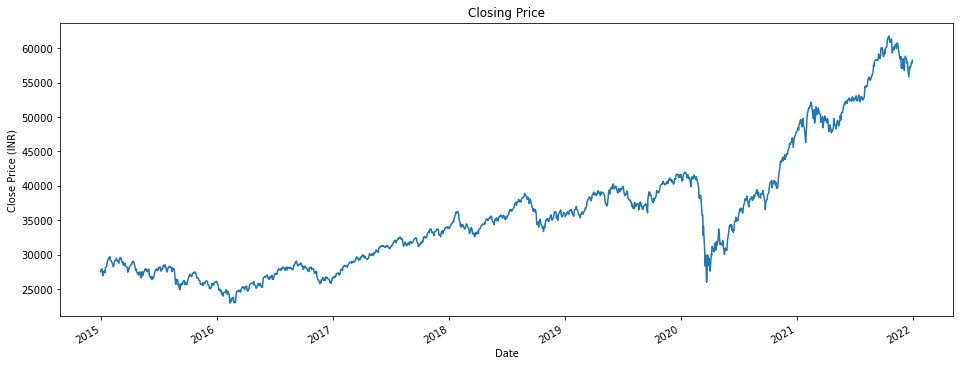

In [53]:
plt.figure(figsize=(16,6))
stock['Close'].plot()
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Close Price (INR)')

In [55]:
#calculatinf 7 days rolling mean
stock.rolling(7).mean().head(10)

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-09,27408.430525,-1.000000,0.128571,0.784286,0.087143,27445.518415,27586.258650,27226.694196,9814.285714
2015-01-12,27420.694754,-0.714286,0.124286,0.784286,0.091429,27469.169643,27599.604353,27223.514230,9957.142857
2015-01-13,27354.670480,-0.714286,0.122857,0.784286,0.092857,27482.066964,27561.421317,27195.702846,10014.285714
2015-01-14,27283.884766,-0.714286,0.124286,0.784286,0.091429,27404.025670,27482.608538,27112.331473,10157.142857


<AxesSubplot:>

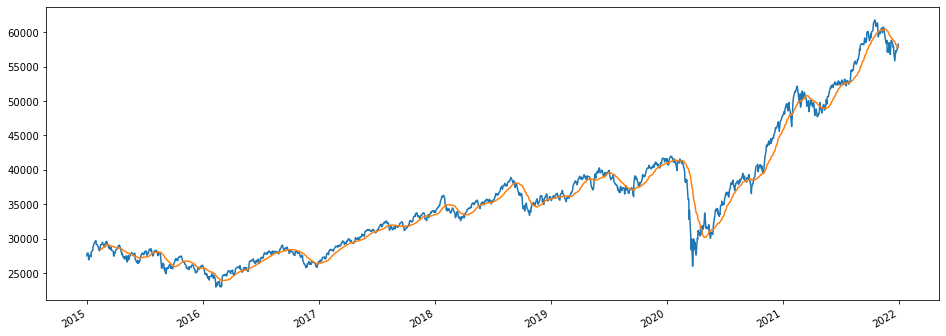

In [56]:
#plotting closing price and 30 days rolling mean of close price 
plt.figure(figsize=(16,6))
stock['Close'].plot()
stock.rolling(window=30).mean()['Close'].plot()

# Data Preparation for Modelling

In [58]:
# caLcuLating data_to_use
percentage_of_data = 1.0
data_to_use = int(percentage_of_data*(len(stock)-1))

# using 80% of data for training 
train_end = int(data_to_use*0.8) 
total_data = len(stock) 
start = total_data - data_to_use

# printing number of records in the training and test datasets 
print("Number of records in Training Data:", train_end) 
print("Number of records in Test Data:", total_data - train_end)
                      

Number of records in Training Data: 1376
Number of records in Test Data: 346


In [61]:
# predicting one step ahead 
steps_to_predict = 1

# capturing data to be used for each coLumn
close_price = stock.iloc[start:total_data,0] #cLose 
compound = stock.iloc[start:total_data,1] #compound 
negative = stock.iloc[start:total_data,2] #neg 
neutral = stock.iloc[start:total_data,3] #neu 
positive = stock.iloc[start:total_data,4] #pos 
open_price = stock.iloc[start:total_data,5] #open 
high = stock.iloc[start:total_data,6] #high
low = stock.iloc[start:total_data,7] #Low
volume = stock.iloc[start:total_data,8] #voLume

# printing cLose price
print("Close Price:")
close_price

Close Price:


2015-01-02    27887.900391
2015-01-05    27842.320312
2015-01-06    26987.460938
2015-01-07    26908.820312
2015-01-08    27274.710938
                  ...     
2021-12-27    57420.238281
2021-12-28    57897.480469
2021-12-29    57806.488281
2021-12-30    57794.320312
2021-12-31    58253.820312
Name: Close, Length: 1721, dtype: float64

In [63]:
# shifting next day close 
close_price_shifted = close_price.shift(-1)
                    
# shifting next day compound 
compound_shifted = compound.shift(-1)

# concatenating the captured training data into a dataframe
data = pd.concat([close_price, close_price_shifted, compound, compound_shifted, volume, open_price, high, low], axis=1)

# setting column names of the revised stock data
data.columns = ['close_price', 'close_price_shifted', 'compound', 'compound_shifted','volume', 'open_price', 'high', 'low']
                    
# dropping nulls
data = data.dropna() 
data.head(10)

,close_price,close_price_shifted,compound,compound_shifted,volume,open_price,high,low
2015-01-02,27887.900391,27842.320312,-1.0,-1.0,7400.0,27521.279297,27937.470703,27519.259766
2015-01-05,27842.320312,26987.460938,-1.0,-1.0,9200.0,27978.429688,28064.490234,27786.849609
2015-01-06,26987.460938,26908.820312,-1.0,-1.0,14100.0,27694.230469,27698.929688,26937.060547
2015-01-07,26908.820312,27274.710938,-1.0,-1.0,12200.0,26983.429688,27051.599609,26776.119141
2015-01-08,27274.710938,27458.380859,-1.0,-1.0,8200.0,27178.769531,27316.410156,27101.939453
2015-01-09,27458.380859,27585.269531,-1.0,1.0,11100.0,27404.189453,27507.669922,27119.630859
2015-01-12,27585.269531,27425.730469,1.0,-1.0,7500.0,27523.859375,27620.660156,27323.740234
2015-01-13,27425.730469,27346.820312,-1.0,-1.0,7800.0,27611.560547,27670.189453,27324.580078
2015-01-14,27346.820312,28075.550781,-1.0,-1.0,10200.0,27432.140625,27512.800781,27203.250000
2015-01-15,28075.550781,28121.890625,-1.0,-1.0,16700.0,27831.160156,28194.609375,27703.699219


# Setting target variable and feature dataset

In [115]:
y=data['close_price_shifted']
y

2015-01-02    27842.320312
2015-01-05    26987.460938
2015-01-06    26908.820312
2015-01-07    27274.710938
2015-01-08    27458.380859
                  ...     
2021-12-24    57420.238281
2021-12-27    57897.480469
2021-12-28    57806.488281
2021-12-29    57794.320312
2021-12-30    58253.820312
Name: close_price_shifted, Length: 1720, dtype: float64

In [116]:
## Setting feature dataset for prediction
cols=['close_price','compound','compound_shifted','volume','open_price','high','low']
x=data[cols]
x

,close_price,compound,compound_shifted,volume,open_price,high,low
2015-01-02,27887.900391,-1.0,-1.0,7400.0,27521.279297,27937.470703,27519.259766
2015-01-05,27842.320312,-1.0,-1.0,9200.0,27978.429688,28064.490234,27786.849609
2015-01-06,26987.460938,-1.0,-1.0,14100.0,27694.230469,27698.929688,26937.060547
2015-01-07,26908.820312,-1.0,-1.0,12200.0,26983.429688,27051.599609,26776.119141
2015-01-08,27274.710938,-1.0,-1.0,8200.0,27178.769531,27316.410156,27101.939453
...,...,...,...,...,...,...,...
2021-12-24,57124.308594,-1.0,-1.0,6400.0,57567.109375,57623.691406,56813.421875
2021-12-27,57420.238281,-1.0,-1.0,5700.0,56948.328125,57512.011719,56543.078125
2021-12-28,57897.480469,-1.0,-1.0,5500.0,57751.210938,57952.480469,57650.289062
2021-12-29,57806.488281,-1.0,-1.0,5300.0,57892.308594,58097.070312,57684.578125


# Scaling the target and feature Dataset

In [117]:
from sklearn import preprocessing,metrics
from sklearn.preprocessing import MinMaxScaler

In [118]:
 # scaling the feature dataset
scaler_x = preprocessing.MinMaxScaler (feature_range=(-1, 1))
x = np.array(x).reshape((len(x) ,len(cols)))
x = scaler_x.fit_transform(x)

# scaling the target variable
scaler_y = preprocessing.MinMaxScaler (feature_range=(-1, 1))
y = np.array (y).reshape ((len( y), 1))
y = scaler_y.fit_transform (y)

# displaying the scaled feature dataset and the target variable 
x, y

(array([[-0.74565359, -1.        , -1.        , ..., -0.77179873,
         -0.75477202, -0.74318194],
        [-0.74800224, -1.        , -1.        , ..., -0.74841274,
         -0.74827526, -0.72950499],
        [-0.79205154, -1.        , -1.        , ..., -0.76295124,
         -0.76697283, -0.77293909],
        ...,
        [ 0.8006836 , -1.        , -1.        , ...,  0.77464398,
          0.78042567,  0.79686402],
        [ 0.79599495, -1.        , -1.        , ...,  0.78186198,
          0.7878211 ,  0.79861659],
        [ 0.79536795, -1.        , -1.        , ...,  0.7748582 ,
          0.78336926,  0.79321972]]),
 array([[-0.74800224],
        [-0.79205154],
        [-0.79610374],
        ...,
        [ 0.79599495],
        [ 0.79536795],
        [ 0.81904512]]))

# Dividing data into training and testing set

In [119]:
# preparing training and test dataset 
X_train = x[0 : train_end,]
X_test = x[train_end+1 : len(x),] 
y_train = y[0 : train_end]
y_test = y[train_end+1 : len(y)]

# printing the shape of the training and the test datasets
print('Number of rows and columns in the Training set X:', X_train.shape, 'and y:', y_train.shape) 
print('Number of rows and columns in the Test set X:', X_test.shape, 'and y:', y_test.shape)
                

Number of rows and columns in the Training set X: (1376, 7) and y: (1376, 1)
Number of rows and columns in the Test set X: (343, 7) and y: (343, 1)


# Reshaping Feature dataset

In [120]:
X_train = X_train.reshape (X_train.shape + (1,))
X_test = X_test.reshape(X_test.shape + (1,))

# printing the re-shaped feature dataset 
print('Shape of Training set X:', X_train.shape) 
print('Shape of Test set X:', X_test.shape)

Shape of Training set X: (1376, 7, 1)
Shape of Test set X: (343, 7, 1)


# Stock Data Modelling

In [121]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

In [122]:
# setting the seed to achieve consistent predictions at each execution
np.random.seed(2020)

# setting the model architecture
model=Sequential() 
model.add(LSTM(100,return_sequences=True,activation='tanh',input_shape=(len(cols),1))) 
model.add(Dropout(0.3))
model.add(LSTM(100,return_sequences=True,activation='tanh'))
model.add(Dropout(0.3)) 
model.add(LSTM(100,activation='tanh'))
model.add(Dropout(0.3)) 
model.add(Dense(1))

# printing the model summary 
model. summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 7, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 100)            80400     
                                                                 
 dropout_4 (Dropout)         (None, 7, 100)            0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [123]:
#compiling the model
model.compile(loss='mse', optimizer='adam')

In [125]:
#fitting the model using training set
model.fit(X_train,y_train,validation_split=0.2,epochs=10,batch_size=8,verbose=1)

Epoch 1/10
138/138 [==============================] - 3s 22ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 2/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 3/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0029 - val_loss: 0.0014
Epoch 4/10
138/138 [==============================] - 4s 26ms/step - loss: 0.0029 - val_loss: 0.0012
Epoch 5/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0025 - val_loss: 0.0012
Epoch 6/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0024 - val_loss: 0.0012
Epoch 7/10
138/138 [==============================] - 3s 22ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 8/10
138/138 [==============================] - 4s 26ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 9/10
138/138 [==============================] - 3s 20ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 10/10
138/138 [==============================] - 4s 26ms/step - loss: 0.0022 - val_lo

# Saving the model to disk

In [126]:
# saving the model as a json file
model_json = model.to_json()
with open('model.json', 'w') as json_file: 
    json_file.write(model_json) 
# serialize weights to HDF5 
model.save_weights('mode13.h5') 
print('Model is saved to the disk') 

Model is saved to the disk


# Predictions 

In [127]:
predictions = model.predict(X_test)

11/11 [==============================] - 3s 13ms/step


In [128]:
predictions = scaler_y.inverse_transform(np.array(predictions).reshape((len(predictions),1)))

In [129]:
#printitng predictions
print('predicted values')
predictions[0:5]

predicted values


array([[38494.473],
       [38267.047],
       [38036.44 ],
       [38388.375],
       [38814.473]], dtype=float32)

# Model Evaluation

In [130]:
# caLcuLating the training mean-squared-error
train_loss = model.evaluate(X_train, y_train, batch_size = 1)


# caLcuLating the test mean-squared-error
test_loss = model.evaluate(X_test, y_test, batch_size = 1)


# printing the training and the test mean-squared-errors 
print('Train Loss =', round(train_loss,4))
print('Test Loss =', round(test_loss,4))

343/343 [==============================] - 2s 6ms/step - loss: 0.0258
Train Loss = 0.0005
Test Loss = 0.0258


In [131]:
# caLcuLating root mean squared error using skLearn.metrics package 
rmse = metrics.mean_squared_error(y_test, predictions)
print('Root Mean Square Error (sklearn.metrics)=', round(np.sqrt(rmse),4))

Root Mean Square Error (sklearn.metrics)= 53506.2487


# Plotting predictions against unseen data

In [132]:
X_test = scaler_x.inverse_transform(np.array(X_test).reshape((len(X_test), len(cols))))

# unscaling the test y dataset, y_test 
y_train = scaler_y.inverse_transform(np.array(y_train).reshape((len(y_train), 1))) 
y_test = scaler_y.inverse_transform(np.array(y_test).reshape((len(y_test), 1)))


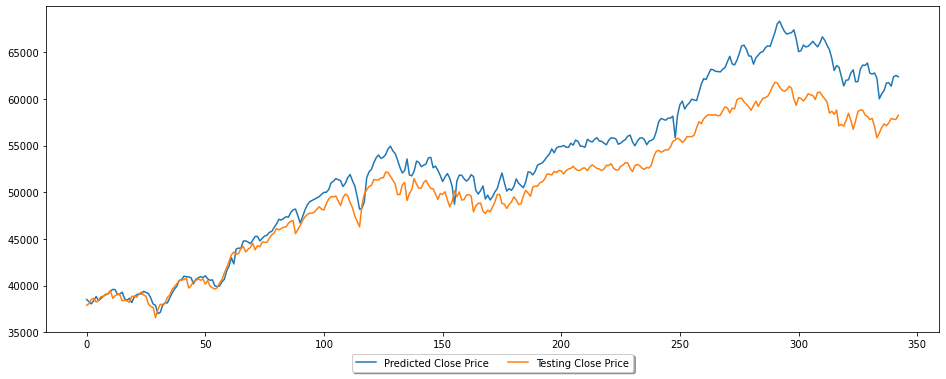

In [133]:
# plotting 
plt.figure(figsize=(16,6))

# plt.plota-row[0] for row in y_train], Label="Training Close Price")
plt.plot(predictions, label="Predicted Close Price")
plt.plot([row[0] for row in y_test], label="Testing Close Price")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=2) 
plt.show()

As you can see the model did quite a good job in prediction of the close price